### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [55]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
df_heart = pd.read_csv('heart.csv')
df_heart.name = 'Heart DF'
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
def get_shape(df):
    df_name = df.name
    print('Shape of {} is {}'.format(df_name,df.shape))

In [6]:
get_shape(df_heart)

Shape of Heart DF is (303, 14)


In [7]:
df_o2Saturation = pd.read_csv('o2Saturation.csv')
df_o2Saturation.name = 'o2Saturation DF'
df_o2Saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [8]:
get_shape(df_o2Saturation)

Shape of o2Saturation DF is (3585, 1)


## Find Data type of each column

In [9]:
# def get_column_dtype(df):
#     dataTypeSeries = df.dtypes
#     print('Data type of each column of Dataframe :\n',dataTypeSeries)
# get_column_dtype(df_heart)

In [10]:
df_heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

### These columsn should not be int but categorical
Sex, cp, fbs, restecg, slp, caa, thall, output

In [12]:
df_heart['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
df_heart['sex'] = df_heart['sex'].astype('object', copy=False)

In [14]:
df_heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [15]:
df_heart['cp'] = df_heart['cp'].astype('object', copy=False)

In [16]:
df_heart['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [17]:
df_heart['fbs'] = df_heart['fbs'].astype('object', copy=False)

In [18]:
df_heart['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [19]:
df_heart['restecg'] = df_heart['restecg'].astype('object', copy=False)

In [20]:
df_heart['exng'].value_counts()

0    204
1     99
Name: exng, dtype: int64

In [21]:
df_heart['exng'] = df_heart['exng'].astype('object', copy=False)

In [22]:
df_heart['slp'].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

In [23]:
df_heart['slp'] = df_heart['slp'].astype('object', copy=False)

In [24]:
df_heart['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [25]:
df_heart['caa'] = df_heart['caa'].astype('object', copy=False)

In [26]:
df_heart['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [27]:
df_heart['thall'] = df_heart['thall'].astype('object', copy=False)

In [28]:
df_heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [29]:
df_heart['output'] = df_heart['output'].astype('object', copy=False)

In [30]:
df_heart.dtypes

age           int64
sex          object
cp           object
trtbps        int64
chol          int64
fbs          object
restecg      object
thalachh      int64
exng         object
oldpeak     float64
slp          object
caa          object
thall        object
output       object
dtype: object

In [31]:
# categorical columns
categorical_columns = df_heart.dtypes[df_heart.dtypes == np.object]
categorical_columns

sex        object
cp         object
fbs        object
restecg    object
exng       object
slp        object
caa        object
thall      object
output     object
dtype: object

In [53]:
numerical_columns = df_heart.dtypes[df_heart.dtypes != np.object]
numerical_columns

age                  int64
trtbps               int64
chol                 int64
thalachh             int64
oldpeak_imputed    float64
oldpeak_zero         int64
dtype: object

## Check Distribution of Data

### QQ plot

#### if QQ is  inconcusive h then use Kolmogorov Smirnov test
#### Use Lilliefors test if mean and variance is not pre defined by the user
#### Shapiro Wilk test is most powerful test you can use

In [32]:
import scipy.stats as stats
import pylab

In [33]:
def plot_qq(df,feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist= 'norm', plot=pylab)
    plt.show()

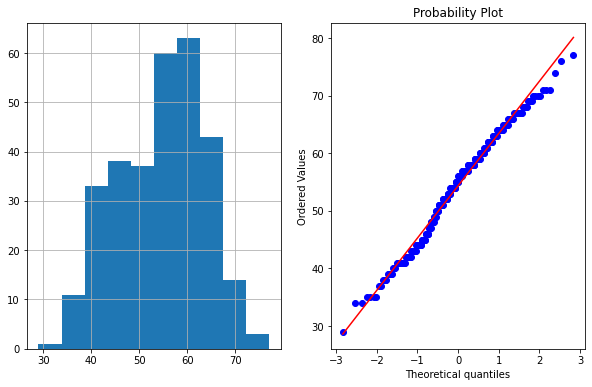

In [34]:
plot_qq(df_heart,'age')

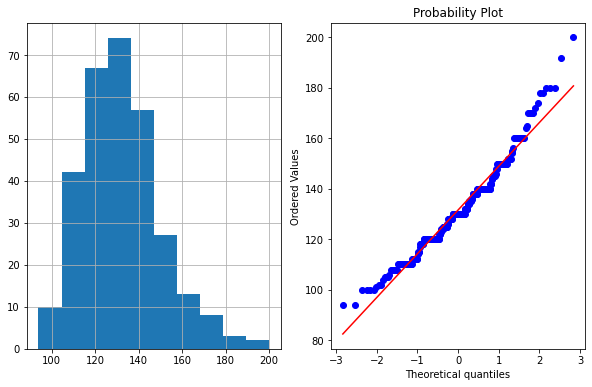

In [35]:
plot_qq(df_heart,'trtbps')

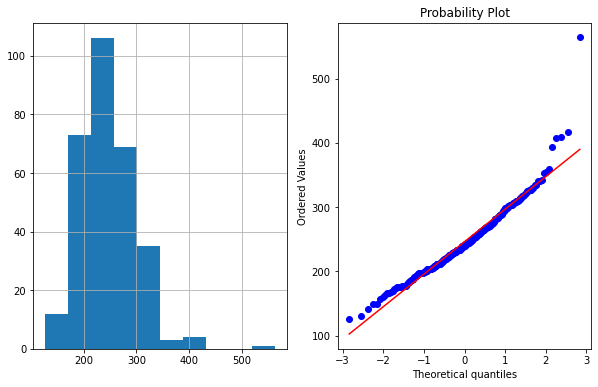

In [36]:
plot_qq(df_heart,'chol')

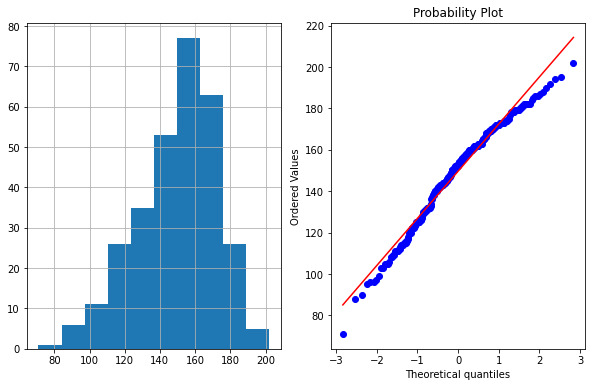

In [37]:
plot_qq(df_heart,'thalachh')

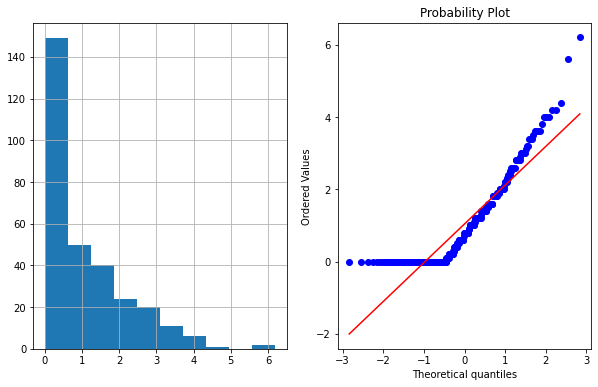

In [38]:
plot_qq(df_heart,'oldpeak')

### Not NORMALLY Distributed

Also it has lots if zero values which in not possible so we are going to correct them

In [39]:
#df_heart['oldpeak_log'] = np.log(df_heart['oldpeak'])

In [40]:
#plot_qq(df_heart,'oldpeak_log')

In [41]:
df_heart[df_heart['oldpeak'] == 0].count()[0]

99

total 99 rows which is a bigchunk of data; almost one third! meh.

In [42]:
df_heart_oldpeak = df_heart['oldpeak'].copy()

In [43]:
df_heart_oldpeak.describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

I think we should take mean and std of the column without the 0 values because 0 clearly is an error during data collection as oldmeak min value is 0.1 (while ignoring zero values)

In [44]:
df_heart_oldpeak_new = df_heart_oldpeak[df_heart_oldpeak.values != 0]

In [45]:
df_heart_oldpeak_new.describe()

count    204.000000
mean       1.544118
std        1.105746
min        0.100000
25%        0.775000
50%        1.400000
75%        2.000000
max        6.200000
Name: oldpeak, dtype: float64

As you can see mean and std are very different

In [46]:
def fillNaN_with_unifrand(df,df_new):
    a = df.values
    # m = np.isnan(a) # mask of NaNs
    m = (df == 0) # mask of zero values
    mu, sigma = df_new.mean(), df_new.std()
    df[m] = np.random.normal(mu, sigma, size=m.sum())
    return df

In [47]:
fillNaN_with_unifrand(df_heart_oldpeak,df_heart_oldpeak_new)

0      2.300000
1      3.500000
2      1.400000
3      0.800000
4      0.600000
         ...   
298    0.200000
299    1.200000
300    3.400000
301    1.200000
302    0.638172
Name: oldpeak, Length: 303, dtype: float64

In [48]:
df_heart['oldpeak_imputed'] = df_heart_oldpeak

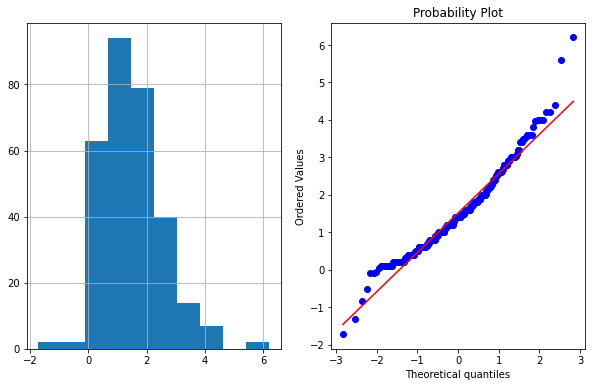

In [49]:
plot_qq(df_heart,'oldpeak_imputed')

NOW it is normally distributed

Now dropping old column and also adding an additional column where oldpeak value was zero

In [50]:
df_heart['oldpeak_zero'] = 0

In [51]:
df_heart.oldpeak_zero[df_heart['oldpeak'] == 0] = 1

<ipython-input-51-6e253d1f0b77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart.oldpeak_zero[df_heart['oldpeak'] == 0] = 1


In [52]:
df_heart.drop('oldpeak', axis = 1, inplace = True)

### Here we did one mistake thats is DATA LEAKAGE
due to taking mean and std of whole data in oldpeak column
we should have split the data first then try to impute the zero values
#### OOPS!!!

# EDA

In [99]:
sns.set_theme(style="white")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [100]:
categorical_columns

sex        object
cp         object
fbs        object
restecg    object
exng       object
slp        object
caa        object
thall      object
output     object
dtype: object

### Count Plots

In [137]:
# sns.countplot(y='sex', data=df_heart, hue='output',palette="Set3")
# sns.despine()

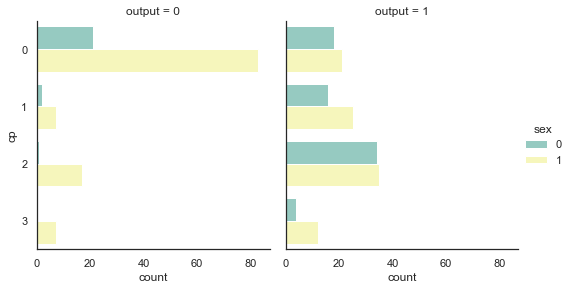

In [136]:
sns.catplot(y="cp", hue="sex", data=df_heart, col = 'output',
            kind = 'count',palette="Set3",
            height=4, aspect= 0.9
           )

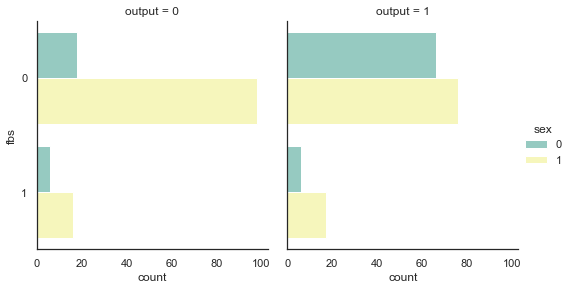

In [138]:
sns.catplot(y="fbs", hue="sex", data=df_heart, col = 'output',
            kind = 'count',palette="Set3",
            height=4, aspect= 0.9
           )

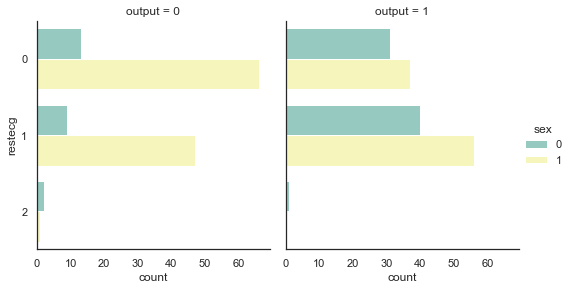

In [140]:
sns.catplot(y="restecg", hue="sex", data=df_heart, col = 'output',
            kind = 'count',palette="Set3",
            height=4, aspect= 0.9
           )

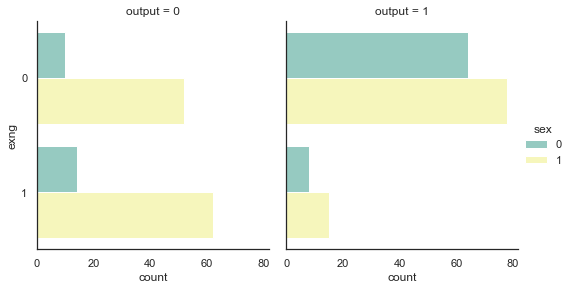

In [141]:
sns.catplot(y="exng", hue="sex", data=df_heart, col = 'output',
            kind = 'count',palette="Set3",
            height=4, aspect= 0.9
           )

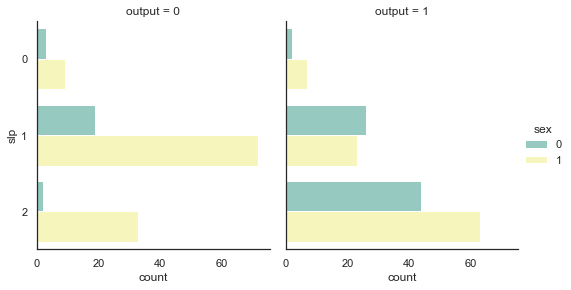

In [142]:
sns.catplot(y="slp", hue="sex", data=df_heart, col = 'output',
            kind = 'count',palette="Set3",
            height=4, aspect= 0.9
           )

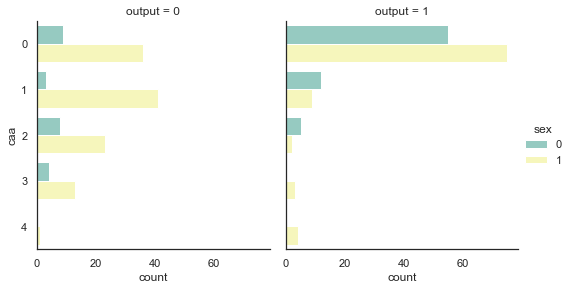

In [143]:
sns.catplot(y="caa", hue="sex", data=df_heart, col = 'output',
            kind = 'count',palette="Set3",
            height=4, aspect= 0.9
           )

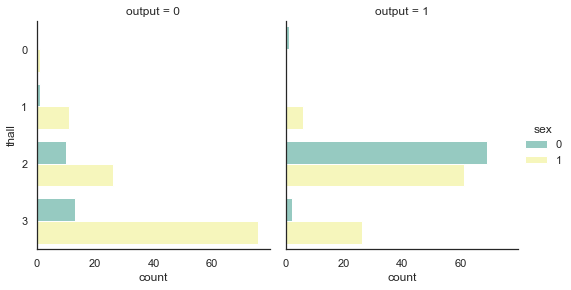

In [144]:
sns.catplot(y="thall", hue="sex", data=df_heart, col = 'output',
            kind = 'count',palette="Set3",
            height=4, aspect= 0.9
           )

### Numerical Data

In [105]:
numerical_columns

age                  int64
trtbps               int64
chol                 int64
thalachh             int64
oldpeak_imputed    float64
oldpeak_zero         int64
dtype: object

<AxesSubplot:>

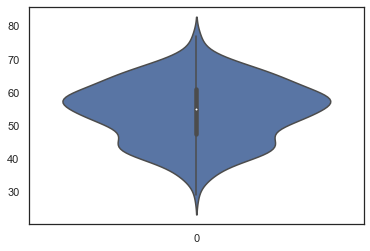

In [103]:
sns.violinplot(data=df_heart['age'])

C:\Users\ezgupha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

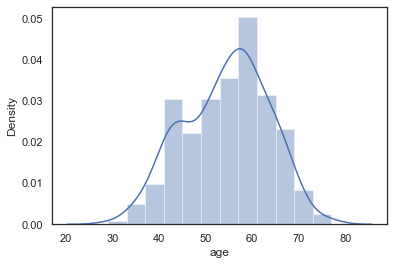

In [147]:
sns.distplot(a=df_heart['age'])

<AxesSubplot:>

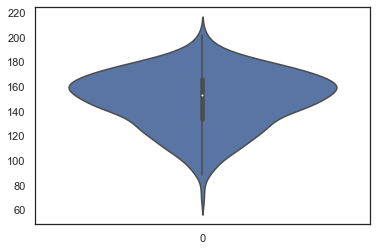

In [145]:
sns.violinplot(data=df_heart['thalachh'], palette="deep")

C:\Users\ezgupha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

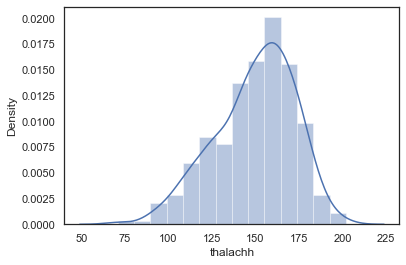

In [148]:
sns.distplot(a=df_heart['thalachh'])

<AxesSubplot:>

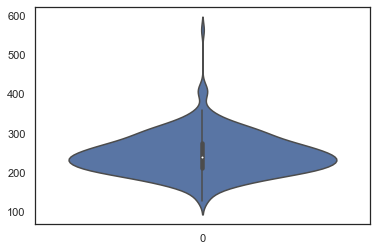

In [149]:
sns.violinplot(data=df_heart['chol'], palette="deep")

C:\Users\ezgupha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

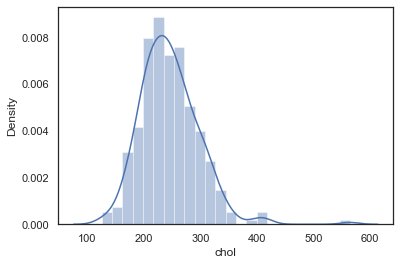

In [150]:
sns.distplot(a=df_heart['chol'])

<AxesSubplot:>

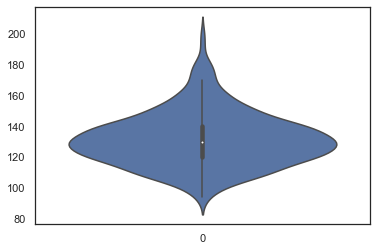

In [151]:
sns.violinplot(data=df_heart['trtbps'], palette="deep")

C:\Users\ezgupha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trtbps', ylabel='Density'>

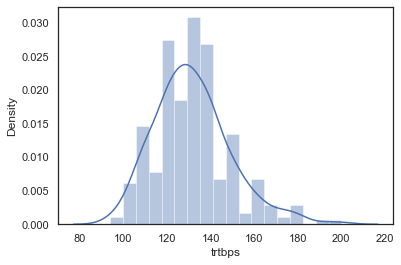

In [152]:
sns.distplot(a=df_heart['trtbps'])

<AxesSubplot:>

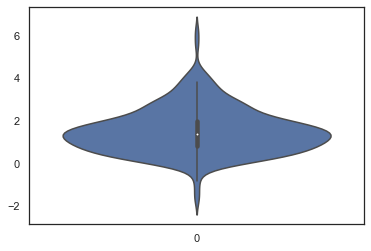

In [153]:
sns.violinplot(data=df_heart['oldpeak_imputed'], palette="deep")

C:\Users\ezgupha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak_imputed', ylabel='Density'>

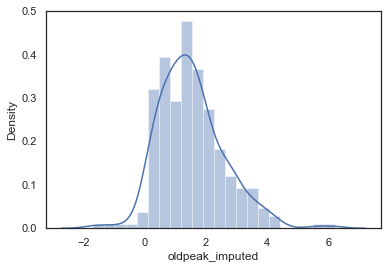

In [154]:
sns.distplot(a=df_heart['oldpeak_imputed'])

## Some Observations

Values for feature caa class 4 is very low; number of major vessels (0-3)

Values for feature thall class 0 is very low;

Values for feature restecg class 0 is very low;

    rest_ecg : resting electrocardiographic results

        Value 0: normal

        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### We have outliers in chol, oldpeak_imputed and trtbps
For now we are not making any changes we will move on to feature engineering

## Feature Engineering

#### Lets check correlation via heat map

In [177]:
df_heart['output'] = df_heart['output'].astype('int')

<AxesSubplot:>

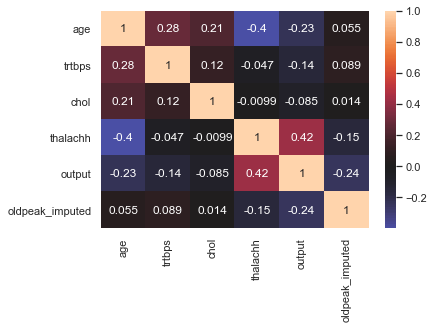

In [180]:
sns.heatmap(df_heart.iloc[:, lambda df_heart: df_heart.columns.str.contains('age|trtbps|chol|thalachh|oldpeak_imputed|output',
                                              case=False)].corr(),
            center=0,annot=True, cbar = True
           ) 

### Observations
age and thalachh are negatively correlated but only 40%

output is very much goverened by thalachh and not by chol as we assumed initially

Interesting lets look into thalachh more

In [184]:
df_heart['thalachh'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

It is a little left skweed but for now not doing anything as it does not vary form normal dist that much and we are applying normalization anyway

In [239]:
#df_heart['output'] = df_heart['output'].astype('object')
df_heart['output'] = df_heart['output'].astype('int')

### One hot encoding

In [242]:
categorical_columns

sex        object
cp         object
fbs        object
restecg    object
exng       object
slp        object
caa        object
thall      object
output     object
dtype: object

In [240]:
from sklearn.preprocessing import OneHotEncoder

In [241]:
enc = OneHotEncoder(handle_unknown='ignore')

In [258]:
df_heart_onehotencoded = pd.get_dummies(df_heart, columns=['cp', 'restecg', 'slp', 'caa', 'thall'], drop_first = True)

In [259]:
df_heart_onehotencoded.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,output,oldpeak_imputed,oldpeak_zero,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,1,2.3,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,1,3.5,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1,1.4,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,1,0.8,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,1,0.6,0,...,0,0,1,0,0,0,0,0,1,0


### Must Split test data to avoid data leakage

In [223]:
from sklearn.preprocessing import MinMaxScaler

In [195]:
from sklearn.model_selection import train_test_split

In [280]:
X = df_heart_onehotencoded.loc[:,df_heart_onehotencoded.columns != 'output']
y = df_heart_onehotencoded['output']

In [281]:
X.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak_imputed,oldpeak_zero,cp_1,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,0,...,0,0,1,0,0,0,0,0,1,0


In [287]:
y = pd.DataFrame(y)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Normalization

In [295]:
min_max_scaler = MinMaxScaler()

In [296]:
X_train_scaled = min_max_scaler.fit_transform(X_train)

In [297]:
X_test_scaled = min_max_scaler.transform(X_test)

In [298]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [299]:
X_test_scaled = pd.DataFrame(X_test_scaled)

In [301]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.465116,1.0,0.571429,0.233256,0.0,0.719626,0.0,0.422658,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.558140,0.0,0.265306,0.482679,0.0,0.785047,0.0,0.476151,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.302326,1.0,0.183673,0.168591,0.0,0.514019,0.0,0.206155,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.558140,1.0,0.204082,0.431871,0.0,0.485981,0.0,0.826798,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.558140,1.0,0.061224,0.237875,0.0,0.635514,0.0,0.206155,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Building

In [313]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [311]:
from sklearn.metrics import confusion_matrix

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [305]:
log_reg = LogisticRegression()

In [315]:
score = cross_val_score(log_reg,X_train_scaled,y=y_train, 
                        cv=3, n_jobs=None, scoring = 'accuracy',
                        verbose=0)

C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [317]:
score.mean()

0.8179689786362306

### Random Forest Classifier

In [318]:
rf = RandomForestClassifier()

In [319]:
score = cross_val_score(rf,X_train_scaled,y=y_train, 
                        cv=3, n_jobs=None, scoring = 'accuracy',
                        verbose=0)

C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [320]:
score.mean()

0.7933128475270704

### Xgboost

In [321]:
from sklearn.ensemble import GradientBoostingClassifier

In [322]:
xgboost = GradientBoostingClassifier()

In [323]:
score = cross_val_score(xgboost,X_train_scaled,y=y_train, 
                        cv=3, n_jobs=None, scoring = 'accuracy',
                        verbose=0)

C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [324]:
score.mean()

0.7884840503365526

### SVC

In [325]:
svc = SVC()

In [326]:
score = cross_val_score(svc,X_train_scaled,y=y_train, 
                        cv=3, n_jobs=None, scoring = 'accuracy',
                        verbose=0)

C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [327]:
score.mean()

0.793166520339479

#### All models are relatively close with XgBoost as lowest so we will go ahead with this.

### Hypertuning Model

In [361]:
xgboost.fit(X_train_scaled, y_train)

C:\Users\ezgupha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [363]:
pred = xgboost.predict(X_test_scaled)

In [365]:
confusion_matrix(y_test, pred)

array([[35,  7],
       [13, 45]], dtype=int64)

In [366]:
from sklearn.metrics import accuracy_score

In [367]:
accuracy_score(y_test, pred, normalize=False)

80

In [368]:
from sklearn.metrics import precision_recall_curve

In [369]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)

In [373]:
precision[1]

0.8653846153846154

In [374]:
recall[1]

0.7758620689655172

In [375]:
thresholds[1]

1